<a href="https://colab.research.google.com/github/santoshdhalwalkar/Telecommunication/blob/main/Telecommunication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#import drive from google
from google.colab import drive

In [5]:
# mount the drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#import the liabaries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [7]:
# read the data from google drive
df =pd.read_csv("/content/drive/MyDrive/telcom_data.csv")
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.00,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.00,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.00,17587794.00,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.00,13994646.00,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.00,17124581.00,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,16191667.0,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0
149997,7.349880e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,13877234.0,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0
149998,1.311450e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,22660510.0,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0
149999,1.311450e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,L88342B,...,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0


In [8]:
df.shape

(150001, 55)

In [9]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [11]:
from datetime import datetime

###Unix epoch, using pandas' pd.to_datetime

#### The function has a clear purpose: one for conversion and one for applying that conversion to a DataFrame column.

In [12]:
# Function to convert date string to milliseconds since the Unix epoch using pandas
def to_milliseconds_using_pandas(date_str):
    # Convert date string to datetime, coerce errors to NaT
    timestamp = pd.to_datetime(date_str, format="%m/%d/%Y %H:%M", errors='coerce')
    # Return None if the date is NaT
    if pd.isnull(timestamp):
        return None
    # Convert to milliseconds since Unix epoch
    return int(timestamp.timestamp() * 1000)

# Function to apply the conversion function to a specific column
def convert_column_to_milliseconds(df, column_name):
    df[column_name] = df[column_name].apply(to_milliseconds_using_pandas)

# Convert 'Start' and 'End' columns
convert_column_to_milliseconds(df, 'Start')
convert_column_to_milliseconds(df, 'End')

# Display the first few rows and the updated data types
print(df.head())
print(df.dtypes)

      Bearer Id         Start  Start ms           End  End ms  Dur. (ms)  \
0  1.311450e+19  1.554379e+12     770.0  1.556203e+12   662.0  1823652.0   
1  1.311450e+19  1.554815e+12     235.0  1.556180e+12   606.0  1365104.0   
2  1.311450e+19  1.554832e+12       1.0  1.556193e+12   652.0  1361762.0   
3  1.311450e+19  1.554856e+12     486.0  1.556178e+12   171.0  1321509.0   
4  1.311450e+19  1.555100e+12     565.0  1.556189e+12   954.0  1089009.0   

           IMSI  MSISDN/Number          IMEI Last Location Name  ...  \
0  2.082010e+14   3.366496e+10  3.552120e+13        9.16457E+15  ...   
1  2.082020e+14   3.368185e+10  3.579400e+13            L77566A  ...   
2  2.082000e+14   3.376063e+10  3.528150e+13            D42335A  ...   
3  2.082010e+14   3.375034e+10  3.535660e+13            T21824A  ...   
4  2.082010e+14   3.369980e+10  3.540700e+13            D88865A  ...   

   Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0          15854611.0           2501332.0    

In [13]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,1.554379e+12,770.0,1.556203e+12,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,1.554815e+12,235.0,1.556180e+12,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,1.554832e+12,1.0,1.556193e+12,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,1.554856e+12,486.0,1.556178e+12,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,1.555100e+12,565.0,1.556189e+12,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [14]:
# Function to convert Last Location Name to int if possible, otherwise NaN
def convert_to_int(value):
    try:
        return int(float(value))
    except ValueError:
        return None

# Apply the function to the "Last Location Name" column
df['Last Location Name'] = df['Last Location Name'].apply(convert_to_int)

In [15]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,1.554379e+12,770.0,1.556203e+12,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.164570e+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,1.554815e+12,235.0,1.556180e+12,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,NaN,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,1.554832e+12,1.0,1.556193e+12,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,NaN,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,1.554856e+12,486.0,1.556178e+12,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,NaN,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,1.555100e+12,565.0,1.556189e+12,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,NaN,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [16]:
# Replace NaN values with a specific integer, e.g., 0
df['Last Location Name'].fillna(0, inplace=True)

In [17]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,1.554379e+12,770.0,1.556203e+12,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.164570e+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,1.554815e+12,235.0,1.556180e+12,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,0.000000e+00,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,1.554832e+12,1.0,1.556193e+12,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,0.000000e+00,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,1.554856e+12,486.0,1.556178e+12,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,0.000000e+00,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,1.555100e+12,565.0,1.556189e+12,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,0.000000e+00,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [18]:
df.isnull().sum()


,0
Bearer Id,991
Start,1
Start ms,1
End,1
End ms,1
Dur. (ms),1
IMSI,570
MSISDN/Number,1066
IMEI,572
Last Location Name,0


#### Fill the null values for the time component data, Id columns

In [19]:
# Ensure the data is sorted by a time-related column if applicable
# For example, 'Start' or another datetime column
df = df.sort_values(by='Start')  # Replace 'Start' with your datetime column name if different


# Apply forward fill and backward fill to fill missing values
df['Bearer Id'] = df['Bearer Id'].ffill().bfill()
df['Start'] = df['Start'].ffill().bfill()
df['End'] = df['End'].ffill().bfill()
df['IMSI'] = df['IMSI'].ffill().bfill()
df['MSISDN/Number'] = df['MSISDN/Number'].ffill().bfill()
df['IMEI'] = df['IMEI'].ffill().bfill()
a=df.isnull().sum()
print(a)

Bearer Id                                        0
Start                                            0
Start ms                                         1
End                                              0
End ms                                           1
Dur. (ms)                                        1
IMSI                                             0
MSISDN/Number                                    0
IMEI                                             0
Last Location Name                               0
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

#### Fill the null values for numerical columns




In [20]:

# Select numerical columnsnumerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Define a function to fill missing values with mean or median
def fill_missing_values(data, columns, strategy='mean'):
    if strategy == 'mean':
        for col in columns:
            df[col].fillna(data[col].mean(), inplace=True)
    elif strategy == 'median':
        for col in columns:
            df[col].fillna(data[col].median(), inplace=True)

            # Example: Filling missing values with median
fill_missing_values(df, numerical_cols, strategy='median')

# Verify that there are no more missing values in the numerical columns
missing_values = df[numerical_cols].isnull().sum()
print(missing_values)


Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

#### Fill the null values for  categorical columns

In [21]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values with mode for each categorical column
for col in categorical_cols:
    mode_value = df[col].mode()[0]  # Calculate the mode for the column
    df[col].fillna(mode_value, inplace=True)  # Fill missing values with the mode

# Verify that there are no more missing values in the categorical columns
df.isnull().sum()


,0
Bearer Id,0
Start,0
Start ms,0
End,0
End ms,0
Dur. (ms),0
IMSI,0
MSISDN/Number,0
IMEI,0
Last Location Name,0


In [22]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,1.554379e+12,770.0,1.556203e+12,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.164570e+15,...,15854611.0,2501332.00,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0
25000,1.311450e+19,1.554779e+12,868.0,1.556254e+12,267.0,1474663.0,2.082020e+14,3.360750e+10,3.592370e+13,0.000000e+00,...,20629532.0,9512221.00,22054947.00,419804.00,88042442.0,4.368837e+06,329470719.0,1.537045e+07,31402931.0,145604005.0
125000,1.304240e+19,1.554803e+12,752.0,1.556663e+12,194.0,1859336.0,2.082010e+14,3.362578e+10,3.528140e+13,0.000000e+00,...,10163169.0,6427023.00,19192742.00,21799809.00,236781692.0,1.839956e+06,273131802.0,4.844901e+06,35967601.0,270532405.0
125001,1.311450e+19,1.554803e+12,547.0,1.556663e+12,539.0,1859327.0,2.082010e+14,3.362578e+10,3.528140e+13,0.000000e+00,...,11795585.0,3798756.00,5359834.00,7098414.00,828368274.0,1.633332e+07,365492157.0,3.041753e+06,32832250.0,858011364.0
1,1.311450e+19,1.554815e+12,235.0,1.556180e+12,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,0.000000e+00,...,20247395.0,19111729.00,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149939,7.277830e+18,1.556523e+12,304.0,1.556584e+12,341.0,61610.0,2.082020e+14,3.366096e+10,3.594850e+13,0.000000e+00,...,8495224.0,5306489.00,3556457.00,17636352.00,269477920.0,4.985484e+06,131248361.0,9.159086e+06,39443064.0,294679476.0
149938,7.349880e+18,1.556523e+12,405.0,1.556606e+12,360.0,82745.0,2.082020e+14,3.361957e+10,3.556210e+13,0.000000e+00,...,22613630.0,9523815.00,18752564.00,15464894.00,781632345.0,4.811422e+06,47444070.0,1.082820e+07,44038913.0,829833410.0
149946,1.304240e+19,1.556523e+12,642.0,1.556611e+12,780.0,88151.0,2.082010e+14,3.366098e+10,3.536980e+13,0.000000e+00,...,13440534.0,14022107.00,6354225.00,11006739.00,586299601.0,1.166482e+07,475373756.0,3.378200e+05,41034976.0,619739938.0
149999,1.311450e+19,1.556523e+12,696.0,1.556621e+12,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,0.000000e+00,...,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0


In [23]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


#### Rename the columns name to avoid invalid syntax

In [24]:
# Renaming columns

df = df.rename(columns={
    'Bearer Id': 'BearerId',    'Start ms': 'StartMS',    'End ms': 'EndMS',    'MSISDN/Number': 'MSISDNNumber',
    'Last Location Name': 'LastLocationName',   'AI Lens': 'AILens',    'Battery_': 'Battery',    'Battery Type': 'BatteryType',
    'Cell Id': 'CellId',  'Handset Manufacturer': 'HandsetManufacturer',  'Handset Type': 'HandsetType',  'Handset Sub-Type': 'HandsetSubType',
    'Last Location Longitude': 'LastLocationLongitude',   'Last Location Latitude': 'LastLocationLatitude',     'Last Location Time': 'LastLocationTime',
    'Avg RTT DL (ms)': 'AvgRTT_DL',     'Avg RTT UL (ms)': 'AvgRTT_UL',     'Avg Bearer TP DL (kbps)': 'AvgBearerTP_DL',     'Avg Bearer TP UL (kbps)': 'AvgBearerTP_UL',
    'HTTP DL (Bytes)': 'HTTP_DL', 'HTTP UL (Bytes)': 'HTTP_UL',     'Activity Duration DL (ms)': 'ActivityDuration_DL',
    'Activity Duration UL (ms)': 'ActivityDuration_UL', 'Total DL (Bytes)': 'Total_DL',      'Total UL (Bytes)': 'Total_UL',
    'Total DL (Bytes)': 'Total_DL',     'Total UL (Bytes)': 'Total_UL',     'HTTP DL (Bytes)': 'HTTP_DL',     'HTTP UL (Bytes)': 'HTTP_UL',
    'Activity Duration DL (ms)': 'ActivityDuration_DL',   'Activity Duration UL (ms)': 'ActivityDuration_UL', 'Dur. (ms)': 'Durms',
    'TCP DL Retrans. Vol (Bytes)': 'TCPDLRetransVol_Bytes',     'TCP UL Retrans. Vol (Bytes)': 'TCPULRetransVol_Bytes',
    'DL TP < 50 Kbps (%)': 'DLTP_50Kbps',     '50 Kbps < DL TP < 250 Kbps (%)': 'DLTP_250Kbps',     '250 Kbps < DL TP < 1 Mbps (%)': 'DLTP_1Mbps',
    'DL TP > 1 Mbps (%)': 'DLTP_1p5Mbps',    'UL TP < 10 Kbps (%)': 'ULTP_10Kbps',      '10 Kbps < UL TP < 50 Kbps (%)': 'ULTP_50Kbps',
    '50 Kbps < UL TP < 300 Kbps (%)': 'ULTP_300Kbps',       'UL TP > 300 Kbps (%)': 'ULTP_300p5Mbps',     'Dur. (ms).1': 'Durms_1',
    'Nb of sec with Vol UL < 1250B': 'Seconds_DL_Volume_Over_125KB',         'Nb of sec with Vol DL < 1250B': 'Seconds_UL_Volume_Over_125KB',
    'Nb of sec with 1250B < Vol UL < 6250B': 'Seconds_DL_Volume_Over_625KB',      'Nb of sec with 31250B < Vol DL < 125000B': 'Seconds_UL_Volume_Over_125KB',
    'Nb of sec with 37500B < Vol UL': 'Seconds_DL_Volume_Over_375KB',        'Nb of sec with 6250B < Vol DL < 31250B': 'Seconds_UL_Volume_Over_625KB',
    'Nb of sec with 6250B < Vol UL < 37500B': 'Seconds_DL_Volume_Over_375KB',     'Nb of sec with Vol DL < 6250B': 'Seconds_UL_Volume_Over_625KB',
    'Social Media DL (Bytes)': 'SocialMediaDL_Bytes',        'Social Media UL (Bytes)': 'SocialMediaUL_Bytes',
    'Google DL (Bytes)': 'GoogleDL_Bytes',      'Google UL (Bytes)': 'GoogleUL_Bytes',      'Email DL (Bytes)': 'EmailDL_Bytes',      'Email UL (Bytes)': 'EmailUL_Bytes',
    'Youtube DL (Bytes)': 'YoutubeDL_Bytes',    'Youtube UL (Bytes)': 'YoutubeUL_Bytes',    'Netflix DL (Bytes)': 'NetflixDL_Bytes',  'Netflix UL (Bytes)': 'NetflixUL_Bytes',
    'Gaming DL (Bytes)': 'GamingDL_Bytes',    'Gaming UL (Bytes)': 'GamingUL_Bytes',    'Other DL (Bytes)': 'OtherDL_Bytes',    'Other UL (Bytes)': 'OtherUL_Bytes',

     })

In [25]:
df.columns

Index(['BearerId', 'Start', 'StartMS', 'End', 'EndMS', 'Durms', 'IMSI',
       'MSISDNNumber', 'IMEI', 'LastLocationName', 'AvgRTT_DL', 'AvgRTT_UL',
       'AvgBearerTP_DL', 'AvgBearerTP_UL', 'TCPDLRetransVol_Bytes',
       'TCPULRetransVol_Bytes', 'DLTP_50Kbps', 'DLTP_250Kbps', 'DLTP_1Mbps',
       'DLTP_1p5Mbps', 'ULTP_10Kbps', 'ULTP_50Kbps', 'ULTP_300Kbps',
       'ULTP_300p5Mbps', 'HTTP_DL', 'HTTP_UL', 'ActivityDuration_DL',
       'ActivityDuration_UL', 'Durms_1', 'HandsetManufacturer', 'HandsetType',
       'Nb of sec with 125000B < Vol DL', 'Seconds_DL_Volume_Over_625KB',
       'Seconds_UL_Volume_Over_125KB', 'Seconds_DL_Volume_Over_375KB',
       'Seconds_UL_Volume_Over_625KB', 'Seconds_DL_Volume_Over_375KB',
       'Seconds_UL_Volume_Over_625KB', 'Seconds_DL_Volume_Over_125KB',
       'SocialMediaDL_Bytes', 'SocialMediaUL_Bytes', 'GoogleDL_Bytes',
       'GoogleUL_Bytes', 'EmailDL_Bytes', 'EmailUL_Bytes', 'YoutubeDL_Bytes',
       'YoutubeUL_Bytes', 'NetflixDL_Bytes', 'Netfli

In [26]:
df.HandsetManufacturer.unique()

array(['Samsung', 'undefined', 'Tp-Link Technologies Co Ltd', 'Huawei',
       'Apple', 'Sony Mobile Communications Ab', 'Zte',
       'TP-Link Technologies Co Ltd', 'Quectel Wireless Solutions Co Ltd',
       'Nokia', 'Ertebat Hamrah Guya Arvand', 'Wiko Global Sasu',
       'Oneplus Technology (Shenzhen) Co Ltd',
       'Xiaomi Communications Co Ltd', 'Asustek', 'TCL Communication Ltd',
       'Logicom Sa', 'Zebra Technologies Corp.', 'Wiko', 'ZTE',
       'Tcl Communication Ltd', 'Lenovo', 'Rim', 'Hmd Global Oy',
       'Sony Mobile Communications AB', 'D-Link Corporation', 'Wct',
       'Dn Electronics', 'Netgear Inc', 'Neel Enterprise',
       'Teletalk Pvt Ltd', 'DDM Brands LLC', 'Sierra Wireless',
       'Google Inc', 'Shenzhen Chainway Information Technology Co Ltd',
       'Microsoft Mobile Oy', 'Htc', 'Crosscall',
       'Shenzhen Kdi Communication Co Ltd',
       'Simcom Wireless Solutions Co Ltd',
       'Qingdao Hisense Communications Co Ltd', 'Lg', 'Archos Sa',
       'Hew

In [27]:
df.HandsetManufacturer.value_counts()

,count
HandsetManufacturer,
Apple,60137
Samsung,40839
Huawei,34423
undefined,8987
Sony Mobile Communications Ab,980
Wiko Global Sasu,747
Xiaomi Communications Co Ltd,397
Oneplus Technology (Shenzhen) Co Ltd,342
Asustek,285


In [28]:
df.HandsetType.value_counts()

,count
HandsetType,
Huawei B528S-23A,20324
Apple iPhone 6S (A1688),9419
Apple iPhone 6 (A1586),9023
undefined,8987
Apple iPhone 7 (A1778),6326
Apple iPhone Se (A1723),5187
Apple iPhone 8 (A1905),4993
Apple iPhone Xr (A2105),4568
Samsung Galaxy S8 (Sm-G950F),4520


In [37]:
# Count the occurrences of each handset type and select the top 10
top_handsets =df['HandsetType'].value_counts().head(10)

# Display the top 10 handsets
print(top_handsets)

HandsetType
Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
Unknown                          8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [36]:
# Replace 'undefined' with 'Unknown'
df['HandsetType'] = df['HandsetType'].replace('undefined', 'Unknown')

# Then, find the top 10 handsets
top_handsets_with_unknown = df['Handset Type'].value_counts().head(10)
print(top_handsets_with_unknown)

Handset Type
Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
Unknown                          8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


Top 10 Handsets and Their Occurrences:
HandsetType
Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
Unknown                          8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


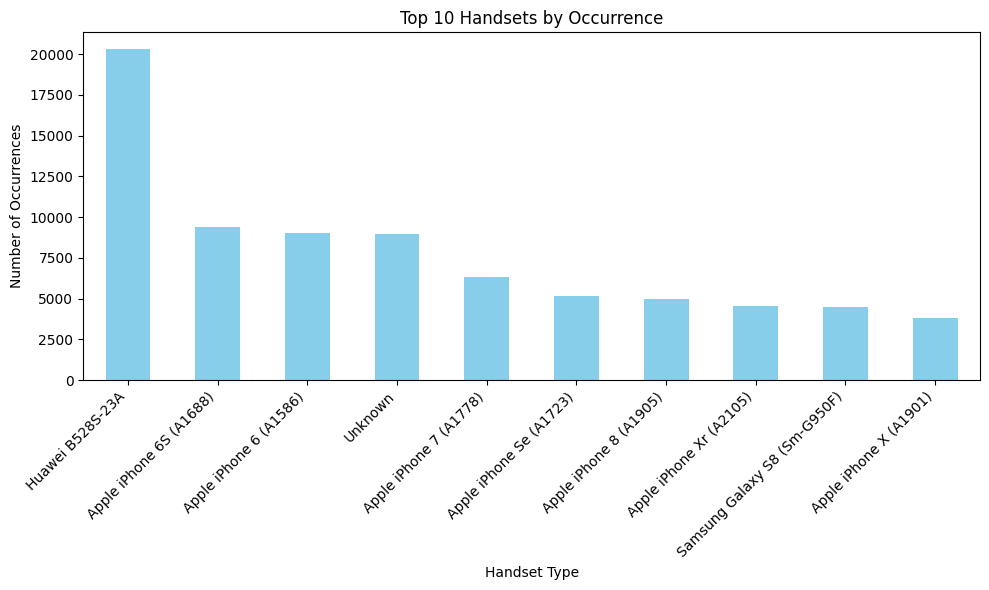

In [40]:
# Display the top 10 handsets and their occurrence numbers
print("Top 10 Handsets and Their Occurrences:")
print(top_10_handsets)

# Plot the data
plt.figure(figsize=(10, 6))
top_10_handsets.plot(kind='bar', color='skyblue')
plt.title('Top 10 Handsets by Occurrence')
plt.xlabel('Handset Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()

In [30]:
# Count the occurrences of each handset type and select the top 10
top_HandsetManufacturer =df['HandsetManufacturer'].value_counts().head(3)

# Display the top 10 handsets
print(top_HandsetManufacturer)

HandsetManufacturer
Apple      60137
Samsung    40839
Huawei     34423
Name: count, dtype: int64
